<a href="https://colab.research.google.com/github/fxnnxc/class-MachineLearning/blob/master/Assignment05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment05 
Logistic Regression

## 1. Plot the training data

plot the training data points (x,y) with their labels in colors (blue for label 0 and red for label 1)

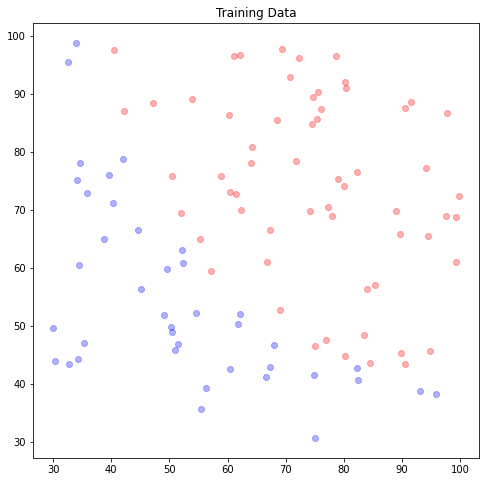

In [2]:
# Read data
import numpy as np
import matplotlib.pyplot as plt

data    = np.genfromtxt("data5.txt", delimiter=',')

x       = data[:, 0]
y       = data[:, 1]
label   = data[:, 2]

x_label0    = x[label == 0]
x_label1    = x[label == 1]

y_label0    = y[label == 0]
y_label1    = y[label == 1]

plt.figure(figsize=(8, 8))
plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
plt.scatter(x_label1, y_label1, alpha=0.3, c='r')
plt.title('Training Data')
plt.show()